# 機械特性計算したdirでcohesive energy計算する 

In [2]:
from glob import glob
from mlptools.analyzer.cohesive_energy import CohesiveEnergyCalculator, CohesiveEnergyReader

In [1]:
# elastic dirに対してcohesive energyを計算してみる

CUTOFF = 5.0
NUM_ATOMS = 8000

path2template = "/sqfs2/cmc/1/work/G15529/v60746/result/lammps/Si/cohesive_energy/template"
target_dir_list = glob("/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e*")
# cohesive_energy_dict = {
#     "target_dir": [],
#     "cohesive_energy": []
# }
for target_dir in target_dir_list:
    path2target, path2potential = target_dir, target_dir
    cohesive_energy_calculator = CohesiveEnergyCalculator(
        path2template=path2template,
        path2potential=path2potential,
        path2target=path2target,
        cutoff=CUTOFF
    )
    cohesive_energy_calculator.setup()
    # cohesive_energy = cohesive_energy_calculator.calculate()
    # cohesive_energy_dict["target_dir"].append(target_dir)
    # cohesive_energy_dict["cohesive_energy"].append(cohesive_energy)
# path2target = f"/home/y1u0d2/result/lammps/scripts/Si/cohesive_energy/model_{POTENTIAL_NUM}"
# path2potential = f"/home/y1u0d2/result/lammps/models/Si/{POTENTIAL_NUM}"

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_103/single/in.single
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_103/minimize/in.minimize
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_101/single/in.single
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_101/minimize/in.minimize
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_53/single/in.single
write to /sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_53/minimize/in.minimize
*-*-*-*

# 結果の可視化

In [10]:
target_dir_list = glob("/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e*")
target_dir_list = sorted(target_dir_list, key=lambda x: int(x.split("/")[-1].split("_")[-1]))
print(target_dir_list[:5])

['/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_0', '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_1', '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_2', '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_3', '/sqfs2/cmc/1/work/G15529/v60746/result/n2p2/Si/103/dimer_10x_over_1.6ang/elastic/e_4']


In [11]:
cohesive_energy_reader = CohesiveEnergyReader(
    num_atoms=8000
)

cohesive_energy_dict = {
    "target_dir": [],
    "cohesive_energy": []

}
for target_dir in target_dir_list:
    cohesive_energy = cohesive_energy_reader.read(target_dir)
    cohesive_energy_dict["target_dir"].append(target_dir)
    cohesive_energy_dict["cohesive_energy"].append(cohesive_energy)

**************************************************
Cohesive energy: 3.0938432011274855 eV/atom
**************************************************
Cohesive energy: -4.270417884771363 eV/atom
**************************************************
Cohesive energy: -4.263135951590026 eV/atom
**************************************************
Cohesive energy: -4.290034264530055 eV/atom
**************************************************
Cohesive energy: -4.328484671047423 eV/atom
**************************************************
Cohesive energy: -4.308906110548763 eV/atom
**************************************************
Cohesive energy: -4.331066948502441 eV/atom
**************************************************
Cohesive energy: -4.339888925329898 eV/atom
**************************************************
Cohesive energy: -4.34720336309867 eV/atom
**************************************************
Cohesive energy: -4.352008284883807 eV/atom
**************************************************


(-5.0, -2.0)

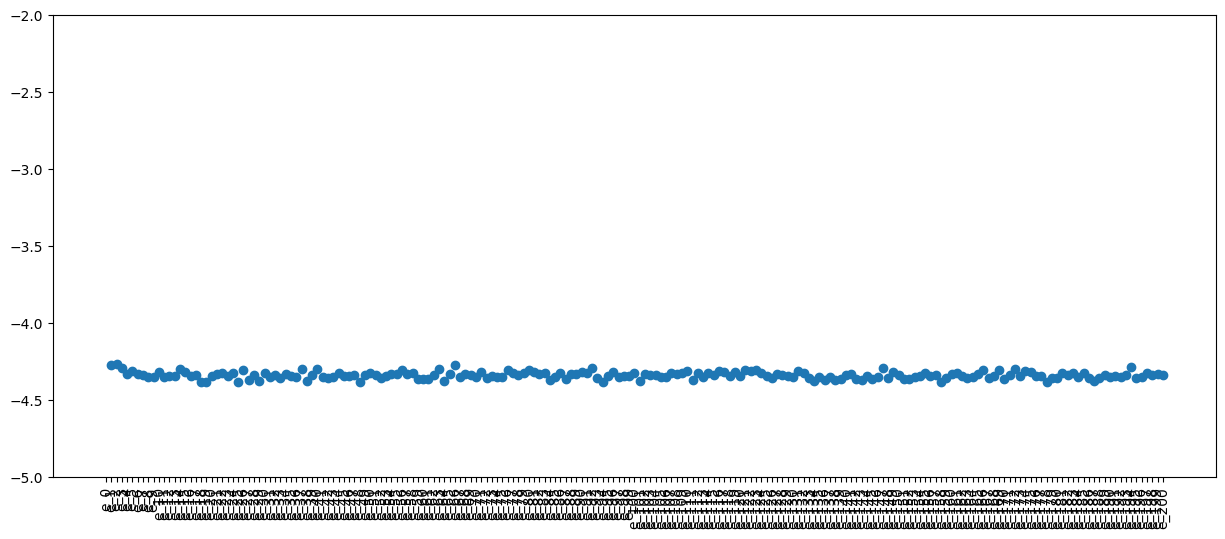

In [12]:
import os

fig, ax = plt.subplots(figsize=(15, 6))
target_dir_basename_list = [os.path.basename(s) for s in cohesive_energy_dict["target_dir"]]
ax.scatter(target_dir_basename_list, cohesive_energy_dict["cohesive_energy"])
# rotate xticks
plt.xticks(rotation=90)
ax.set_ylim(-5, -2)

In [14]:
cohesive_energy_dict["cohesive_energy"][57]

-4.328754612579941